**Gestione Energetica ed Automazione negli Edifici (GEAE) A.A. 2024/2025**

*Tutto il materiale didattico messo a disposizione degli studenti (compresi script, markdown, presentazioni, video e Virtual Classroom) è da utilizzarsi esclusivamente per scopi didattici e nell’ambito del corso di “gestione energetica e automazione negli edifici”. È vietata ogni forma di utilizzo diverso, redistribuzione e pubblicazione on line. Per ogni eventuale dubbio o richiesta contattare il titolare del corso prof. Alfonso Capozzoli a alfonso.capozzoli@polito.it*

# Introduction to Pandas and Matplotlib
## Importing Pandas

In this section, we will start by importing Pandas, which is a powerful library used for data manipulation and analysis in Python. Pandas provides data structures like Series and DataFrame, which are fundamental for handling and analyzing data efficiently.

In [1]:
import pandas as pd
import numpy as np

## Creating a DataFrame
Create a DataFrame from a dictionary of lists:

In [2]:
data = {
    'Temperature (°C)': [20, 25, 30, 35, 40],
    'Pressure (bar)': [1.0, 1.2, 1.4, 1.6, 1.8],
    'Flow Rate (m³/h)': [100, 150, 200, 250, 300]
}

df = pd.DataFrame(data)
print("Initial DataFrame:")
print(df)

Initial DataFrame:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0                20             1.0               100
1                25             1.2               150
2                30             1.4               200
3                35             1.6               250
4                40             1.8               300


## Exploring the Data

Once the DataFrame is created, it's important to explore it to understand the structure and the contents. We use methods like `.head()` to view the first few rows, `.info()` to get information about data types and missing values, and `.describe()` to generate summary statistics. This initial exploration helps us understand the dataset better before diving into more complex analyses.

In [3]:
print("\nDataFrame Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature (°C)  5 non-null      int64  
 1   Pressure (bar)    5 non-null      float64
 2   Flow Rate (m³/h)  5 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 252.0 bytes
None

Descriptive Statistics:
       Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
count          5.000000        5.000000          5.000000
mean          30.000000        1.400000        200.000000
std            7.905694        0.316228         79.056942
min           20.000000        1.000000        100.000000
25%           25.000000        1.200000        150.000000
50%           30.000000        1.400000        200.000000
75%           35.000000        1.600000        250.000000
max           40.000000        1.800000        300.000000


## Selection and Indexing
Selecting a specific column.

In [4]:
temperatures = df['Temperature (°C)']
print("\nTemperature Column:")
print(temperatures)


Temperature Column:
0    20
1    25
2    30
3    35
4    40
Name: Temperature (°C), dtype: int64


Selecting multiple columns.

In [5]:
temperature_and_pressure = df[['Temperature (°C)', 'Pressure (bar)']]
print("\nTemperature and Pressure Columns:")
print(temperature_and_pressure)


Temperature and Pressure Columns:
   Temperature (°C)  Pressure (bar)
0                20             1.0
1                25             1.2
2                30             1.4
3                35             1.6
4                40             1.8


Selecting rows

In [6]:
first_row = df.loc[0]
print("\nFirst Row of the DataFrame:")
print(first_row)


First Row of the DataFrame:
Temperature (°C)     20.0
Pressure (bar)        1.0
Flow Rate (m³/h)    100.0
Name: 0, dtype: float64


In [7]:
first_three_rows = df.loc[0:2]
print("\nFirst Three Rows of the DataFrame:")
print(first_three_rows)


First Three Rows of the DataFrame:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0                20             1.0               100
1                25             1.2               150
2                30             1.4               200


In [8]:
last_row = df.loc[df.index[-1]]
print("\nLast Row of the DataFrame:")
print(last_row)


Last Row of the DataFrame:
Temperature (°C)     40.0
Pressure (bar)        1.8
Flow Rate (m³/h)    300.0
Name: 4, dtype: float64


Selecting a specific value

In [9]:
specific_value = df.loc[2, 'Pressure (bar)']
print("\nSpecific value at row 2, column 'Pressure (bar)':", specific_value)


Specific value at row 2, column 'Pressure (bar)': 1.4


## Filtering Data
Filtering rows where temperature is greater than 30°C

In [10]:
df_high_temp = df[df['Temperature (°C)'] > 30]
print("\nData with temperature greater than 30°C:")
print(df_high_temp)


Data with temperature greater than 30°C:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
3                35             1.6               250
4                40             1.8               300


## Adding and Removing Columns

In [11]:
mass = 1000  # kg
specific_heat = 4.18  # kJ/(kg·K)
initial_temperature = 15  # °C
df['Thermal Energy (kJ)'] = mass * specific_heat * (df['Temperature (°C)'] - initial_temperature)
print("\nDataFrame with Calculated Thermal Energy:")
print(df)


DataFrame with Calculated Thermal Energy:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)  Thermal Energy (kJ)
0                20             1.0               100              20900.0
1                25             1.2               150              41800.0
2                30             1.4               200              62700.0
3                35             1.6               250              83600.0
4                40             1.8               300             104500.0


## Grouping and aggregation
Calculating the average flow rate for each pressure

In [12]:
average_flow_rate = df.groupby('Pressure (bar)')['Flow Rate (m³/h)'].mean()
print("\nAverage Flow Rate by Pressure:")
print(average_flow_rate)


Average Flow Rate by Pressure:
Pressure (bar)
1.0    100.0
1.2    150.0
1.4    200.0
1.6    250.0
1.8    300.0
Name: Flow Rate (m³/h), dtype: float64


## Merging DataFrames

In [13]:
data2 = {
    'Temperature (°C)': [25, 30, 35],
    'Efficiency (%)': [80, 82, 85]
}

df_efficiency = pd.DataFrame(data2)

# Merging DataFrames on the 'Temperature (°C)' column
df_merged = pd.merge(df, df_efficiency, on='Temperature (°C)', how='left')
print("\nMerged DataFrame with Efficiency:")
print(df_merged)


Merged DataFrame with Efficiency:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)  Thermal Energy (kJ)  \
0                20             1.0               100              20900.0   
1                25             1.2               150              41800.0   
2                30             1.4               200              62700.0   
3                35             1.6               250              83600.0   
4                40             1.8               300             104500.0   

   Efficiency (%)  
0             NaN  
1            80.0  
2            82.0  
3            85.0  
4             NaN  


## Handling Missing Data

In [14]:
data3 = {
    'Temperature (°C)': [20, 25, None, 35, 40],
    'Pressure (bar)': [1.0, 1.2, 1.4, 1.6, None],
    'Flow Rate (m³/h)': [100, 150, 200, None, 300]
}

df_missing = pd.DataFrame(data3)
print("\nDataFrame with Missing Data:")
print(df_missing)


DataFrame with Missing Data:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0              20.0             1.0             100.0
1              25.0             1.2             150.0
2               NaN             1.4             200.0
3              35.0             1.6               NaN
4              40.0             NaN             300.0


Dropping rows with missing values

In [15]:
df_cleaned = df_missing.dropna()
print("\nDataFrame after Dropping Rows with Missing Values:")

print(df_cleaned)


DataFrame after Dropping Rows with Missing Values:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0              20.0             1.0             100.0
1              25.0             1.2             150.0


Filling missing values with a specific value

In [16]:
df_filled = df_missing.fillna(0)
print("\nDataFrame after Filling Missing Values with 0:")
print(df_filled)


DataFrame after Filling Missing Values with 0:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0              20.0             1.0             100.0
1              25.0             1.2             150.0
2               0.0             1.4             200.0
3              35.0             1.6               0.0
4              40.0             0.0             300.0


Using na interpolation to fill missing values

In [17]:
df_interpolated = df_missing.interpolate()
print("\nDataFrame after Interpolating Missing Values:")
print(df_interpolated)


DataFrame after Interpolating Missing Values:
   Temperature (°C)  Pressure (bar)  Flow Rate (m³/h)
0              20.0             1.0             100.0
1              25.0             1.2             150.0
2              30.0             1.4             200.0
3              35.0             1.6             250.0
4              40.0             1.6             300.0


# Introduction to data visualization with matplotlib

In [18]:
import matplotlib.pyplot as plt

Plotting Temperature vs. Thermal Energy

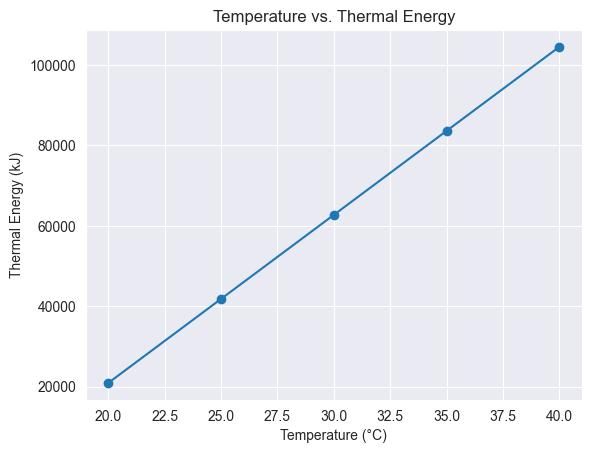

In [19]:
plt.plot(df['Temperature (°C)'], df['Thermal Energy (kJ)'], marker='o')
plt.title('Temperature vs. Thermal Energy')
plt.xlabel('Temperature (°C)')
plt.ylabel('Thermal Energy (kJ)')
plt.grid(True)
plt.show()

In this code, plt.scatter() is used to create a scatter plot that shows the relationship between 'Temperature' and 'Thermal Energy'. The labels for the x and y axes are set using plt.xlabel() and plt.ylabel(), and a title is added with plt.title(). Finally, plt.show() displays the plot.

Bar chart of Efficiency

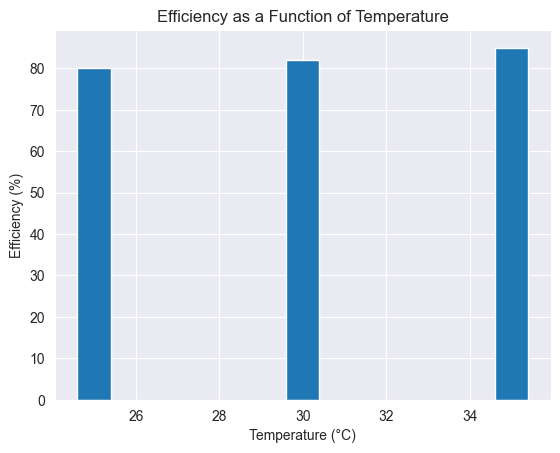

In [20]:
df_merged.dropna(inplace=True)  # Remove rows with NaN values
plt.bar(df_merged['Temperature (°C)'], df_merged['Efficiency (%)'])
plt.title('Efficiency as a Function of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Efficiency (%)')
plt.show()

This code creates a bar chart to visualize the efficiency of different systems. plt.bar() is used to create the bar chart, specifying the 'System' as the x-axis and 'Efficiency' as the y-axis. Labels and a title are added to make the chart more informative, and plt.show() is used to display it.

# Importing data and advanced visualizations

## Importing Seaborn

Seaborn is another powerful library for data visualization built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.

In [21]:
import seaborn as sns

## Reading Data from a CSV File

In [36]:
df = pd.read_csv('../data/PolitoDataExtraction.csv', decimal=',', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'data/PolitoDataExtraction.csv'

read data from a CSV file named 'PolitoDataExtraction.csv'. We specify decimal=',' to correctly interpret decimal values using a comma and sep=';' to indicate that the columns are separated by a semicolon.

## Data summary and statistics

In [23]:
# summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108092 entries, 0 to 108091
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DateTime    108092 non-null  object 
 1   FasciaAEEG  108092 non-null  object 
 2   TotalP      108092 non-null  float64
 3   ChillerP    108092 non-null  float64
 4   Rad         108092 non-null  float64
 5   Test        108092 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.9+ MB
None


In [24]:
# statistics
print(df.describe())

              TotalP       ChillerP            Rad           Test
count  108092.000000  108092.000000  108092.000000  108092.000000
mean      270.617187      18.250988     146.968471      15.483485
std       193.359037      38.255767     231.658396       7.744827
min         0.000000       0.000000       0.000000      -2.100000
25%       150.000000       0.000000       0.300000       9.000000
50%       189.200000       2.400000       4.800000      15.600000
75%       409.600000      14.400000     221.900000      21.300000
max      5157.200000     338.000000    1045.900000      36.700000


## Checking Missing Values

In [25]:
print(df.isna().sum())

DateTime      0
FasciaAEEG    0
TotalP        0
ChillerP      0
Rad           0
Test          0
dtype: int64


The df.isna().sum() method calculates the number of missing values in each column, helping us determine if there are any gaps in the data that need to be handled before analysis.

## Manipulating DateTime Column

In [26]:
# manipulate DateTime column to extract day of the week, month, hour and date
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DayOfWeek'] = df['DateTime'].dt.day_name()
df['Month'] = df['DateTime'].dt.month_name()
df['Hour'] = df['DateTime'].dt.hour
df['Date'] = df['DateTime'].dt.date

Convert the 'DateTime' column to a datetime object using pd.to_datetime(). We then extract the day of the week, month, hour, and date as new columns. This allows us to perform time-based analysis, such as looking at trends by day or hour.

## Heatmap or Carpet Plot of a variable

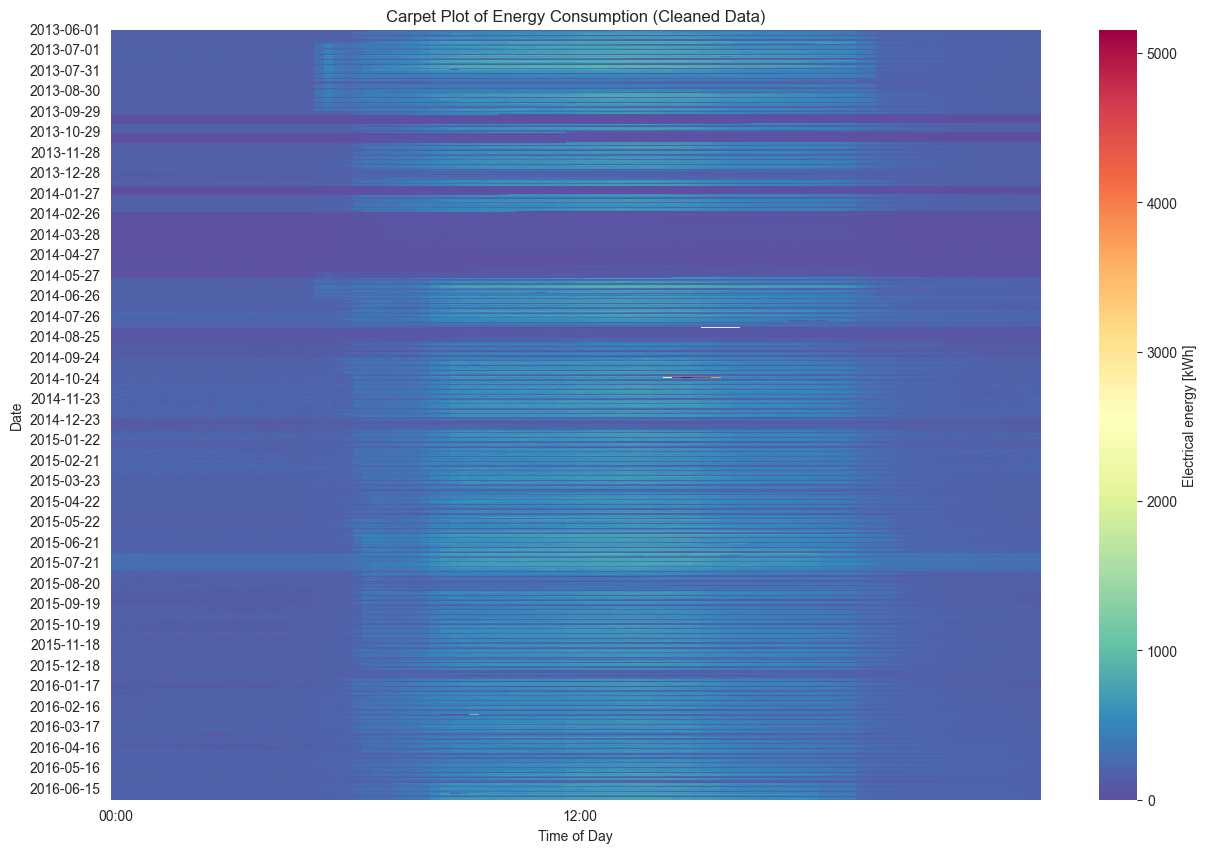

In [27]:
# extract HH:MM from DateTime column
df['Time'] = df['DateTime'].dt.strftime('%H:%M')

# Creating the pivot table
pivot_df = df.pivot_table(index='Date', columns='Time', values='TotalP')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_df, cmap='Spectral_r', cbar_kws={'label': 'Electrical energy [kWh]'}, xticklabels=48, yticklabels=30)
plt.title('Carpet Plot of Energy Consumption (Cleaned Data)')
plt.xlabel('Time of Day')
plt.ylabel('Date')
plt.show()

Extract the time (in HH format) from the 'DateTime' column and create a pivot table to show energy consumption ('TotalP') for each time of day across different dates. The heatmap created using Seaborn's `sns.heatmap()` visualizes energy consumption patterns over time, making it easier to identify trends and anomalies.

## Boxplot of a variable

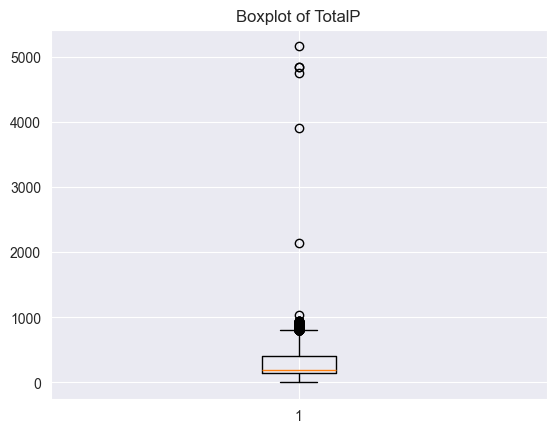

In [28]:
# boxplot of TotalP column
plt.boxplot(df['TotalP'])
plt.title('Boxplot of TotalP')
plt.show()

A boxplot is created for the 'TotalP' column to visualize the distribution, identify the median, and detect potential outliers in the data. This helps us understand the spread and skewness of the 'TotalP' values.

## Boxplot in Function of a Variable

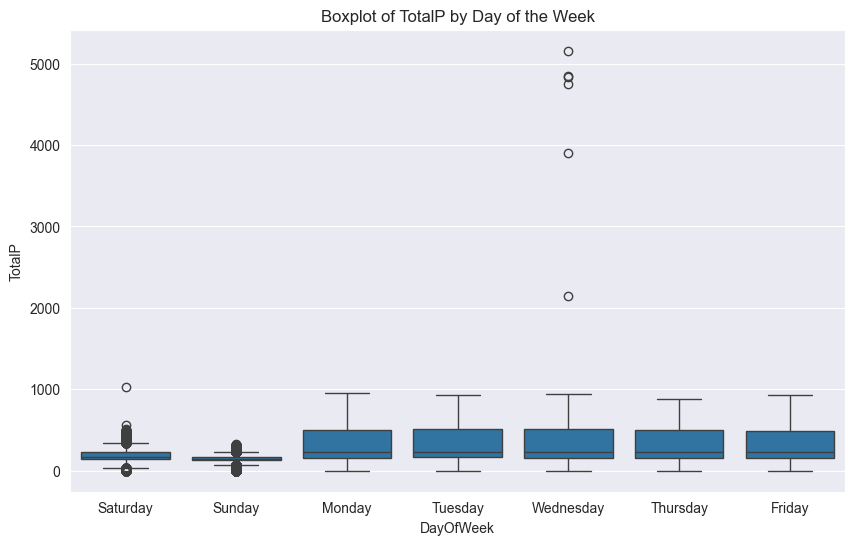

In [29]:
# boxplot in function of the day of the week
plt.figure(figsize=(10, 6))
plt.title('Boxplot of TotalP by Day of the Week')
sns.boxplot(x='DayOfWeek', y='TotalP', data=df)
plt.show()

A boxplot is created to compare the distribution of 'TotalP' values across different days of the week. This visualization helps us identify any variations in energy consumption patterns based on the day of the week.

## Detecting Outliers with the IQR Method

In [30]:
# detect outlier in TotalP column with IQR method and put them to nan
Q1 = df['TotalP'].quantile(0.25)
Q3 = df['TotalP'].quantile(0.75)
IQR = Q3 - Q1
df['TotalP'] = df['TotalP'].apply(lambda x: x if Q1 - 1.5 * IQR < x < Q3 + 1.5 * IQR else np.nan)

The Interquartile Range (IQR) method is used to detect outliers in the 'TotalP' column. Values that fall outside the range defined by Q1 - 1.5 * IQR and Q3 + 1.5 * IQR are replaced with NaN. This helps identify and handle potential outliers that may affect the analysis.

## Substituting Missing Values with Linear Interpolation

In [31]:
# substitute with linear interpolation
df['TotalP'] = df['TotalP'].interpolate()

Linear interpolation is used to fill missing values in the 'TotalP' column. This method estimates the missing values based on the surrounding data points, providing a continuous and smooth replacement for the NaN values.

## Recreating the Pivot Table and Heatmap

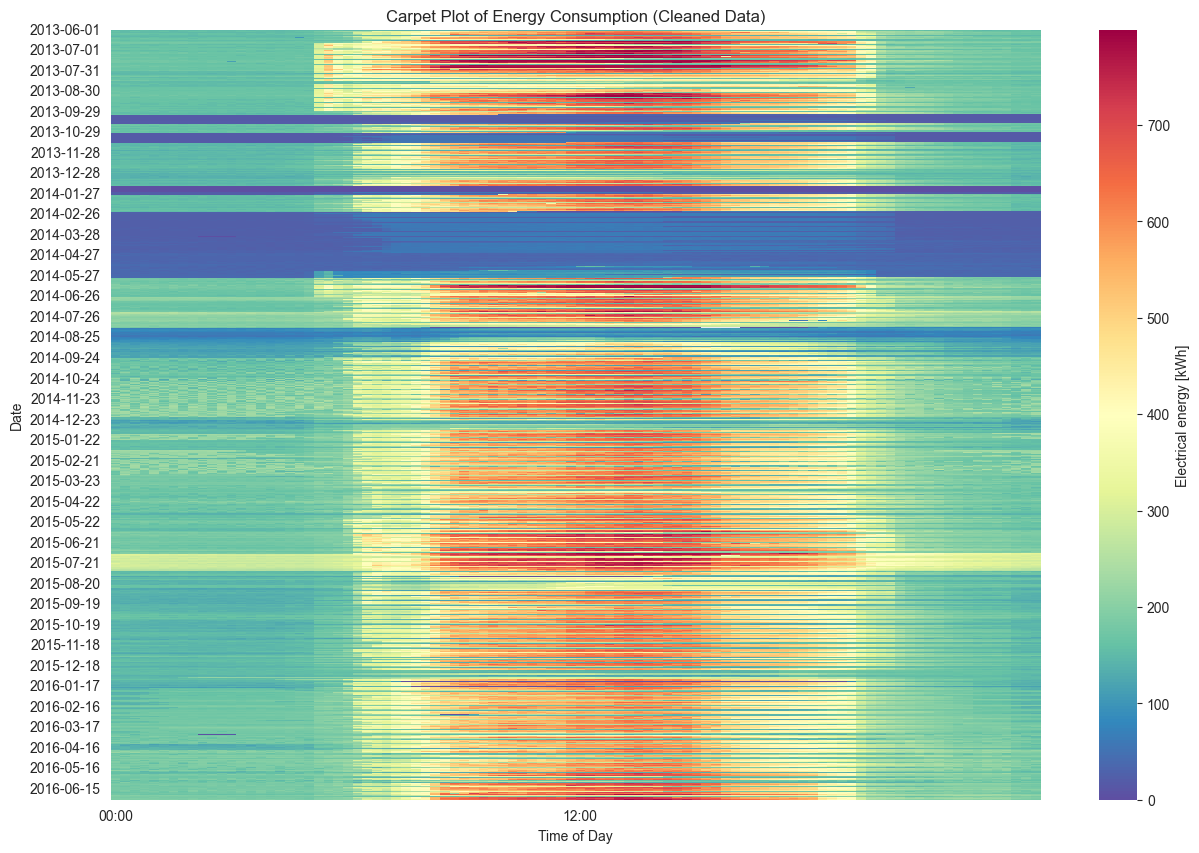

In [32]:
pivot_df = df.pivot_table(index='Date', columns='Time', values='TotalP')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_df, cmap='Spectral_r', cbar_kws={'label': 'Electrical energy [kWh]'}, xticklabels=48, yticklabels=30)
plt.title('Carpet Plot of Energy Consumption (Cleaned Data)')
plt.xlabel('Time of Day')
plt.ylabel('Date')
plt.show()

## Boxplot After Interpolation by Day of the Week

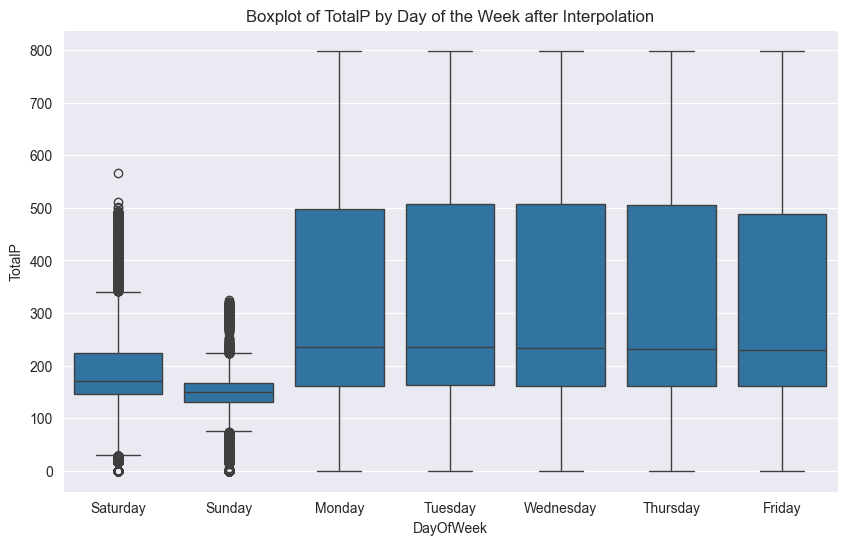

In [33]:
# boxplot of TotalP column after interpolation versus day of the week
plt.figure(figsize=(10, 6))
plt.title('Boxplot of TotalP by Day of the Week after Interpolation')
sns.boxplot(x='DayOfWeek', y='TotalP', data=df)
plt.show()

## Aggregating Data

In [34]:
# aggregate data hourly
df_hourly = df.groupby(['Date', 'Hour'])['TotalP'].mean().reset_index()

## 

In [35]:
df_day_avg = df.groupby('DayOfWeek')['TotalP'].mean().reset_index()
print(df_day_avg)

   DayOfWeek      TotalP
0     Friday  308.819993
1     Monday  313.746717
2   Saturday  181.496588
3     Sunday  139.894269
4   Thursday  314.520476
5    Tuesday  317.014312
6  Wednesday  316.175172
